<a href="https://colab.research.google.com/github/felipeperezleal/nlp-image-description/blob/main/Proyecto_1_Grupo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de Reconocimiento de Entidades y de Relaciones de la descripción de imágenes
Proyecto 1 — Procesamiento de Lenguaje Natural

- Cardona Carrasquilla Andrés Camilo,
- Pérez Leal Sebastián Felipe
- Quintero Contreras Julián Andrés

Departamento de Ingeniería de Sistemas e Industrial

Universidad Nacional de Colombia

##Instalar todos los paquetes necesarios

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=62e91da794905a0fca09104ba280a117766376430576a8d8c7fe40dc3bf3ead9
  Stored in directory: /root/.cache/pip/wheels/81/f2/e0/d578821d723b473d18610ea93810e4a5402463919f07e603d9
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

##Manipulando el dataset

In [ ]:
import pandas as pd

df = pd.read_parquet("hf://datasets/Corran/pexelvideos/PexelVideos.parquet.gzip")

In [ ]:
df.head()

loc  \
0  https://www.pexels.com/video/mother-and-two-ki...   
1  https://www.pexels.com/video/a-girl-playing-tr...   
2  https://www.pexels.com/video/girl-is-posing-wh...   
3  https://www.pexels.com/video/a-girl-opening-th...   
4  https://www.pexels.com/video/girls-leaning-on-...   

                                       thumbnail_loc  \
0  https://images.pexels.com/videos/7603862/adult...   
1  https://images.pexels.com/videos/7603863/adole...   
2  https://images.pexels.com/videos/7603874/adult...   
3  https://images.pexels.com/videos/7603875/adult...   
4  https://images.pexels.com/videos/7603876/affec...   

                                               title  \
0  Mother and Two Kids Sitting on Red Couch · Fre...   
1          A Girl Playing Trumpet · Free Stock Video   
2  Girl is Posing while Bringing her Trumpet Case...   
3  A Girl Opening the Trumpet Case · Free Stock V...   
4  Girls Leaning on a White Wall with Eyes Closed...   

                                         description  \
0  One of many great free stock videos from Pexel...   
1  One of many great free stock videos from Pexel...   
2  One of many great free stock videos from Pexel...   
3  One of many great free stock videos from Pexel...   
4  One of many great free stock videos from Pexel...   

                                         content_loc  \
0  https://player.vimeo.com/external/539902263.hd...   
1  https://player.vimeo.com/external/539902357.hd...   
2  https://player.vimeo.com/external/539903252.hd...   
3  https://player.vimeo.com/external/539903334.hd...   
4  https://player.vimeo.com/external/539903262.hd...   

                    player_loc duration view_count      publication_date  \
0  https://vimeo.com/539902263       18      68169  2021-04-22T00:01:05Z   
1  https://vimeo.com/539902357       16      37216  2021-04-22T00:01:05Z   
2  https://vimeo.com/539903252       13      20019  2021-04-22T00:01:05Z   
3  https://vimeo.com/539903334       18      41994  2021-04-22T00:01:05Z   
4  https://vimeo.com/539903262       11      21017  2021-04-22T00:01:05Z   

  family_friendly requires_subscription  \
0             yes                    no   
1             yes                    no   
2             yes                    no   
3             yes                    no   
4             yes                    no   

                                       uploader_info live  
0  PNW Production url:https://www.pexels.com/u/24...   no  
1  PNW Production url:https://www.pexels.com/u/24...   no  
2  PNW Production url:https://www.pexels.com/u/24...   no  
3  PNW Production url:https://www.pexels.com/u/24...   no  
4  PNW Production url:https://www.pexels.com/u/24...   no

In [ ]:
df = df[['thumbnail_loc','title']]
df.head()

thumbnail_loc  \
0  https://images.pexels.com/videos/7603862/adult...   
1  https://images.pexels.com/videos/7603863/adole...   
2  https://images.pexels.com/videos/7603874/adult...   
3  https://images.pexels.com/videos/7603875/adult...   
4  https://images.pexels.com/videos/7603876/affec...   

                                               title  
0  Mother and Two Kids Sitting on Red Couch · Fre...  
1          A Girl Playing Trumpet · Free Stock Video  
2  Girl is Posing while Bringing her Trumpet Case...  
3  A Girl Opening the Trumpet Case · Free Stock V...  
4  Girls Leaning on a White Wall with Eyes Closed...

In [ ]:
df['title'] = df['title'].apply(lambda x: ' '.join(x.split()[:-4]))
df = df.dropna()
df = df.head(5000)
df.head()

thumbnail_loc  \
0  https://images.pexels.com/videos/7603862/adult...   
1  https://images.pexels.com/videos/7603863/adole...   
2  https://images.pexels.com/videos/7603874/adult...   
3  https://images.pexels.com/videos/7603875/adult...   
4  https://images.pexels.com/videos/7603876/affec...   

                                            title  
0        Mother and Two Kids Sitting on Red Couch  
1                          A Girl Playing Trumpet  
2  Girl is Posing while Bringing her Trumpet Case  
3                 A Girl Opening the Trumpet Case  
4  Girls Leaning on a White Wall with Eyes Closed

In [ ]:
import pandas as pd
from googletrans import Translator

translator = Translator()

df['title'] = df['title'].apply(lambda x: translator.translate(x, src='en', dest='es').text)

df.head()

thumbnail_loc  \
0  https://images.pexels.com/videos/7603862/adult...   
1  https://images.pexels.com/videos/7603863/adole...   
2  https://images.pexels.com/videos/7603874/adult...   
3  https://images.pexels.com/videos/7603875/adult...   
4  https://images.pexels.com/videos/7603876/affec...   

                                               title  
0         Madre y dos niños sentados en el sofá rojo  
1                         Una chica jugando trompeta  
2  La niña posa mientras trae su estuche de trompeta  
3          Una chica que abre la caja de la trompeta  
4  Chicas apoyadas en una pared blanca con ojos c...

##Etiquetado POS y NER

In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm # para visualizar barra de progreso
from IPython.display import display

In [ ]:
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("es_core_news_lg")

data = []

for idx, row in df.iterrows():
  title = row['title']
  doc = nlp(title)

  for token in doc:
    sentence = idx
    token_text = token.text
    pos_tag = token.pos_
    if token.pos_ == 'PROPN' or token.pos_ == 'NOUN':
      ner_tag = 'ENT'
    elif token.pos_ == 'VERB' or token_text == 'en':
      ner_tag = 'REL'
    else:
      ner_tag = 'o'

    data.append([sentence, token_text, pos_tag, ner_tag])

data = pd.DataFrame(data, columns=['sentence', 'token', 'pos', 'ner'])

In [ ]:
data.head()

sentence     token    pos  ner
0         0     Madre  PROPN  ENT
1         0         y  CCONJ    o
2         0       dos    NUM    o
3         0     niños   NOUN  ENT
4         0  sentados    ADJ    o

In [ ]:
data['pos'].unique()

array(['PROPN', 'CCONJ', 'NUM', 'NOUN', 'ADJ', 'ADP', 'DET', 'VERB',
       'SCONJ', 'PRON', 'AUX', 'ADV', 'PUNCT', 'INTJ'], dtype=object)

In [ ]:
labels = data.ner.unique()
display(labels)

array(['ENT', 'o', 'REL'], dtype=object)

In [ ]:
def convert_sentence(df):
    sentence = " ".join(df["token"]) # se extrae el texto completo
    tags = []
    pos = 0
    for _, row in df.iterrows():
        if row["ner"] != 'o': # se remueve los tokens con entidad o
            tags.append(
                    (pos, pos + len(row["token"]), row["ner"])
                    )
        pos += len(row["token"]) + 1 # se asigna la posición de cada token.
    return (sentence, {"entities": tags})

###Por ejemplo

In [ ]:
sent = data.query("sentence == 0")
sent_conv = convert_sentence(sent)
display(sent_conv)

('Madre y dos niños sentados en el sofá rojo',
 {'entities': [(0, 5, 'ENT'),
   (12, 17, 'ENT'),
   (27, 29, 'REL'),
   (33, 37, 'ENT')]})

In [ ]:
corpus = (
        data
        .groupby("sentence")
        .apply(convert_sentence)
        .tolist()
        )
display(corpus[:5])

<ipython-input-15-7723e2684b8f>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(convert_sentence)


[('Madre y dos niños sentados en el sofá rojo',
  {'entities': [(0, 5, 'ENT'),
    (12, 17, 'ENT'),
    (27, 29, 'REL'),
    (33, 37, 'ENT')]}),
 ('Una chica jugando trompeta',
  {'entities': [(4, 9, 'ENT'), (10, 17, 'REL')]}),
 ('La niña posa mientras trae su estuche de trompeta',
  {'entities': [(3, 7, 'ENT'),
    (8, 12, 'REL'),
    (22, 26, 'REL'),
    (30, 37, 'ENT'),
    (41, 49, 'ENT')]}),
 ('Una chica que abre la caja de la trompeta',
  {'entities': [(4, 9, 'ENT'),
    (14, 18, 'REL'),
    (22, 26, 'ENT'),
    (33, 41, 'ENT')]}),
 ('Chicas apoyadas en una pared blanca con ojos cerrados',
  {'entities': [(0, 6, 'ENT'),
    (16, 18, 'REL'),
    (23, 28, 'ENT'),
    (40, 44, 'ENT')]})]

In [ ]:
nlp = spacy.blank("es")
display(nlp)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
ner = nlp.add_pipe("ner")
display(nlp.component_names)

['ner']

In [ ]:
labels = data.ner.unique()
labels = labels[labels != 'o']
display(labels)

array(['ENT', 'REL'], dtype=object)

In [ ]:
for label in labels:
  ner.add_label(label)
display(ner.labels)

('ENT', 'REL')

##Entrenamiento

In [ ]:
from spacy.util import minibatch, compounding
from spacy.training import Example

In [ ]:
ITERS = 5000
LR = 1e-5
DROP = 0.1

optimizer = nlp.begin_training()
optimizer.learn_rate = LR

def train(nlp, batches, n_iter, optimizer, drop):
    # Estructura donde se almacenarán las pérdidas del modelo.
    losses = {}
    # Pérdida acumulada
    loss = 0
    # Barra de progreso
    pbar = tqdm(range(n_iter))
    # Iteramos por un número de iteraciones
    for _ in pbar:
        # Extraemos un batch de datos:
        batches = minibatch(train_data, size=compounding(start=32, stop=64, compound=1.01))
        batch = next(batches, None)

        if batch is None:
            break

        # Convertimos el corpus a ejemplos de spacy.
        examples = []
        for case in batch:
            example = Example.from_dict(
                    nlp.make_doc(case[0]), case[1]
                    )
            examples.append(example)
        # Ajustamos el modelo con el batch de datos
        nlp.update(
            examples,
            sgd=optimizer,
            drop=drop,
            losses=losses
            )

        # Imprimimos la pérdida del modelo.
        cur_loss = losses["ner"] - loss
        pbar.set_description(f"Loss: {cur_loss}")
        loss = losses["ner"]

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(corpus, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {len(train_data)}")
print(f"Datos de prueba: {len(test_data)}")

Datos de entrenamiento: 4000
Datos de prueba: 1000


In [ ]:
train(nlp, train_data, ITERS, optimizer, DROP)

Loss: 2.6170164346694946e-07: 100%|██████████| 5000/5000 [04:03<00:00, 20.56it/s]


In [ ]:
from spacy import displacy
for title, result in test_data:
  doc = nlp(title)
  print(result)
  print(result == {"entities": [(token.idx, token.idx + len(token.text), token.ent_type_) for token in doc if token.ent_type_]})
  displacy.render(doc, jupyter=True, style="ent")

{'entities': [(0, 5, 'ENT'), (10, 17, 'ENT'), (26, 33, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 9, 'REL'), (13, 19, 'ENT')]}
True


{'entities': [(0, 9, 'ENT'), (25, 32, 'REL'), (33, 35, 'REL'), (39, 45, 'ENT')]}
True


{'entities': [(7, 18, 'REL'), (22, 29, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (8, 12, 'ENT'), (15, 19, 'ENT')]}
False


{'entities': [(3, 7, 'ENT'), (8, 16, 'REL'), (17, 29, 'ENT')]}
True


{'entities': [(7, 14, 'REL'), (25, 31, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (22, 30, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (22, 29, 'ENT'), (34, 37, 'REL'), (42, 53, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 15, 'REL'), (20, 31, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 16, 'ENT'), (17, 23, 'ENT'), (24, 34, 'REL'), (38, 46, 'ENT'), (52, 57, 'ENT')]}
True


{'entities': [(0, 7, 'REL'), (11, 21, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (12, 23, 'REL'), (27, 33, 'ENT'), (42, 46, 'ENT')]}
True


{'entities': [(4, 8, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 20, 'REL'), (21, 27, 'ENT')]}
False


{'entities': [(7, 18, 'REL'), (22, 28, 'ENT'), (32, 40, 'ENT')]}
True


{'entities': [(0, 3, 'ENT'), (6, 13, 'ENT'), (14, 22, 'REL')]}
True


{'entities': [(7, 16, 'REL'), (20, 25, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 15, 'REL'), (24, 33, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (8, 12, 'ENT'), (13, 20, 'REL'), (25, 34, 'ENT')]}
True


{'entities': [(4, 8, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 18, 'REL'), (23, 32, 'ENT')]}
True


{'entities': [(0, 11, 'ENT'), (18, 28, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 19, 'REL'), (20, 22, 'REL'), (27, 34, 'ENT'), (35, 37, 'REL'), (38, 43, 'ENT'), (47, 54, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (14, 22, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 19, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 19, 'REL'), (20, 22, 'REL'), (26, 31, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 20, 'REL'), (24, 31, 'ENT'), (35, 42, 'ENT'), (46, 52, 'ENT'), (53, 55, 'REL'), (59, 63, 'ENT'), (67, 75, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 19, 'REL'), (25, 31, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (12, 19, 'REL'), (20, 22, 'REL'), (26, 32, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (9, 17, 'ENT'), (29, 39, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 17, 'REL'), (22, 29, 'ENT'), (33, 37, 'ENT'), (47, 50, 'REL'), (54, 62, 'ENT')]}
True


{'entities': [(7, 14, 'REL'), (19, 23, 'ENT'), (31, 35, 'ENT')]}
True


{'entities': [(0, 3, 'ENT'), (7, 12, 'REL'), (13, 15, 'REL'), (19, 23, 'ENT')]}
False


{'entities': [(0, 9, 'ENT'), (10, 12, 'REL'), (16, 23, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (17, 24, 'REL'), (35, 44, 'ENT'), (48, 55, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (11, 20, 'ENT'), (21, 23, 'REL'), (24, 31, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (19, 25, 'ENT'), (29, 35, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (9, 16, 'ENT'), (17, 24, 'REL'), (25, 32, 'ENT'), (36, 42, 'ENT'), (52, 57, 'REL')]}
True


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (20, 25, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 17, 'REL'), (18, 26, 'ENT'), (48, 55, 'REL')]}
False


{'entities': [(0, 7, 'ENT'), (12, 18, 'ENT'), (22, 30, 'ENT'), (31, 33, 'REL'), (37, 44, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 18, 'REL'), (22, 27, 'ENT'), (31, 37, 'ENT'), (38, 40, 'REL'), (44, 54, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 16, 'REL'), (17, 19, 'REL'), (20, 24, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 18, 'REL'), (23, 30, 'ENT'), (31, 37, 'ENT'), (43, 49, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 14, 'REL'), (18, 24, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (9, 17, 'ENT'), (22, 29, 'REL'), (34, 41, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 20, 'ENT'), (24, 28, 'ENT'), (29, 36, 'REL'), (45, 51, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (27, 34, 'ENT'), (39, 46, 'REL'), (50, 57, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 20, 'ENT'), (25, 30, 'REL'), (34, 40, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (28, 32, 'ENT'), (40, 47, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 22, 'REL'), (23, 33, 'ENT'), (34, 36, 'REL'), (40, 44, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (11, 19, 'REL'), (20, 25, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (8, 17, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (15, 20, 'ENT'), (36, 46, 'ENT'), (47, 49, 'REL'), (53, 61, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (17, 19, 'REL'), (23, 30, 'ENT')]}
False


{'entities': [(3, 12, 'ENT'), (13, 16, 'ENT'), (21, 26, 'REL'), (31, 37, 'ENT'), (41, 46, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (22, 25, 'ENT')]}
True


{'entities': [(3, 11, 'ENT'), (16, 23, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 15, 'ENT'), (21, 23, 'REL'), (28, 32, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (11, 17, 'REL'), (22, 28, 'ENT'), (35, 39, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 17, 'REL'), (21, 28, 'ENT'), (32, 36, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 19, 'REL'), (24, 30, 'ENT'), (34, 38, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 36, 'ENT'), (41, 48, 'REL'), (49, 51, 'REL'), (52, 57, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 17, 'REL'), (21, 28, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (11, 17, 'ENT'), (18, 27, 'REL'), (28, 30, 'REL'), (34, 40, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (9, 17, 'ENT'), (22, 28, 'REL'), (33, 40, 'ENT')]}
True


{'entities': [(5, 12, 'ENT'), (22, 24, 'REL'), (29, 38, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (23, 30, 'ENT')]}
True


{'entities': [(4, 10, 'ENT'), (14, 22, 'ENT'), (31, 38, 'ENT'), (39, 41, 'REL'), (45, 50, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (15, 23, 'REL'), (33, 37, 'REL'), (41, 47, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (18, 26, 'ENT')]}
True


{'entities': [(0, 4, 'ENT')]}
False


{'entities': [(0, 8, 'REL'), (12, 15, 'ENT'), (22, 26, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (21, 27, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (11, 15, 'ENT'), (19, 24, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 9, 'REL'), (13, 20, 'ENT'), (27, 31, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 19, 'REL'), (24, 31, 'ENT'), (35, 38, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 20, 'REL'), (24, 30, 'ENT'), (42, 53, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (25, 30, 'REL'), (34, 40, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 20, 'ENT'), (24, 31, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (5, 12, 'REL'), (16, 22, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 12, 'REL'), (16, 27, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (13, 20, 'REL'), (21, 23, 'REL'), (27, 42, 'ENT'), (43, 45, 'REL'), (49, 55, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (11, 13, 'REL'), (18, 22, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 17, 'ENT'), (23, 30, 'REL'), (34, 40, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 20, 'REL'), (24, 30, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (9, 14, 'ENT'), (18, 24, 'ENT'), (32, 37, 'ENT')]}
True


{'entities': [(4, 10, 'ENT'), (11, 19, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 19, 'ENT'), (31, 38, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 16, 'REL'), (20, 31, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 16, 'REL'), (20, 26, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (13, 18, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (23, 25, 'REL'), (29, 35, 'ENT')]}
False


{'entities': [(0, 9, 'ENT'), (10, 12, 'REL'), (16, 19, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (15, 23, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (17, 23, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 21, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 35, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (8, 12, 'ENT'), (25, 33, 'ENT'), (34, 38, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (11, 16, 'ENT'), (27, 29, 'REL'), (33, 38, 'ENT'), (45, 53, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (21, 27, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (16, 24, 'REL')]}
False


{'entities': [(4, 9, 'ENT'), (10, 19, 'REL')]}
True


{'entities': [(3, 9, 'ENT'), (23, 27, 'ENT')]}
True


{'entities': [(0, 7, 'REL'), (11, 15, 'ENT'), (19, 25, 'ENT'), (26, 28, 'REL'), (32, 37, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 20, 'REL'), (25, 29, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (19, 24, 'ENT'), (32, 36, 'ENT'), (40, 47, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 29, 'ENT'), (30, 39, 'REL'), (40, 42, 'REL'), (46, 49, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (22, 28, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 17, 'ENT'), (27, 34, 'REL'), (38, 44, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (12, 21, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (15, 17, 'REL'), (21, 25, 'ENT'), (35, 39, 'REL'), (40, 42, 'REL'), (46, 52, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 13, 'REL'), (17, 24, 'ENT'), (28, 34, 'ENT'), (57, 59, 'REL'), (63, 67, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (11, 20, 'REL'), (25, 29, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 23, 'REL'), (24, 26, 'REL'), (30, 38, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 16, 'REL'), (19, 25, 'ENT'), (33, 42, 'ENT'), (46, 52, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (14, 22, 'ENT')]}
True


{'entities': [(3, 8, 'ENT'), (9, 16, 'REL'), (27, 31, 'ENT'), (35, 41, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 15, 'REL'), (24, 32, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (16, 23, 'REL'), (32, 36, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 18, 'REL'), (22, 29, 'ENT')]}
False


{'entities': [(0, 10, 'REL'), (17, 24, 'ENT'), (35, 42, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (7, 11, 'ENT'), (12, 20, 'REL'), (21, 33, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (12, 20, 'REL'), (30, 35, 'REL'), (39, 43, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 22, 'REL'), (23, 25, 'REL'), (29, 34, 'ENT')]}
True


{'entities': [(7, 18, 'REL'), (22, 28, 'ENT')]}
True


{'entities': [(30, 35, 'REL'), (36, 45, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (17, 25, 'REL'), (26, 32, 'ENT'), (39, 45, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 20, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 19, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 9, 'REL'), (13, 24, 'ENT'), (43, 48, 'REL'), (54, 58, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 8, 'REL'), (13, 20, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 34, 'ENT'), (41, 52, 'REL'), (53, 57, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 21, 'REL'), (22, 24, 'REL'), (28, 39, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 19, 'REL'), (20, 22, 'REL'), (26, 31, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 21, 'REL'), (22, 27, 'ENT'), (31, 37, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (12, 19, 'ENT'), (20, 26, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (22, 26, 'ENT'), (36, 40, 'REL')]}
True


{'entities': [(0, 4, 'ENT'), (5, 13, 'REL'), (17, 23, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (20, 24, 'ENT'), (34, 37, 'REL'), (41, 49, 'ENT')]}
False


{'entities': [(0, 5, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 17, 'REL'), (21, 32, 'ENT'), (38, 43, 'REL'), (44, 52, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (28, 34, 'ENT'), (39, 45, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 21, 'REL'), (26, 30, 'ENT'), (34, 38, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (8, 12, 'ENT'), (13, 21, 'REL')]}
False


{'entities': [(0, 3, 'ENT'), (7, 14, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 34, 'ENT'), (38, 42, 'ENT')]}
True


{'entities': [(0, 11, 'ENT'), (16, 24, 'REL'), (25, 32, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 19, 'ENT'), (27, 29, 'REL'), (33, 40, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (23, 29, 'ENT'), (33, 39, 'ENT')]}
False


{'entities': [(7, 13, 'REL'), (18, 29, 'ENT')]}
True


{'entities': [(7, 17, 'REL'), (18, 28, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (18, 29, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 19, 'ENT'), (20, 22, 'REL'), (26, 35, 'ENT')]}
True


{'entities': [(4, 10, 'ENT'), (11, 18, 'REL'), (19, 31, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 22, 'ENT')]}
True


{'entities': [(3, 11, 'ENT'), (26, 33, 'REL'), (34, 36, 'REL'), (40, 47, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (12, 19, 'REL'), (20, 26, 'ENT'), (30, 34, 'ENT'), (35, 37, 'REL'), (41, 46, 'ENT'), (50, 56, 'ENT')]}
False


{'entities': [(3, 7, 'ENT'), (12, 17, 'REL'), (22, 27, 'ENT'), (47, 52, 'ENT'), (60, 65, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (19, 21, 'REL'), (25, 40, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 11, 'ENT'), (12, 18, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 14, 'REL'), (18, 24, 'ENT'), (28, 32, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 17, 'REL'), (21, 32, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (12, 19, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 17, 'REL'), (18, 20, 'ENT'), (21, 23, 'REL'), (28, 32, 'ENT'), (36, 38, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 21, 'REL'), (25, 32, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (22, 32, 'ENT'), (33, 41, 'ENT'), (45, 56, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (14, 22, 'ENT'), (23, 31, 'REL'), (36, 41, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 18, 'REL'), (23, 30, 'ENT'), (35, 43, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (9, 14, 'ENT'), (19, 30, 'REL'), (31, 37, 'ENT')]}
True


{'entities': [(3, 7, 'ENT'), (8, 15, 'REL'), (19, 24, 'ENT')]}
False


{'entities': [(0, 11, 'ENT'), (12, 23, 'REL'), (28, 35, 'ENT'), (39, 47, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (12, 23, 'REL'), (36, 42, 'ENT'), (43, 46, 'REL'), (50, 58, 'ENT')]}
False


{'entities': [(3, 10, 'ENT'), (15, 20, 'REL'), (21, 27, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (22, 29, 'ENT')]}
True


{'entities': [(0, 9, 'ENT'), (10, 12, 'REL'), (16, 22, 'ENT'), (26, 32, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 20, 'ENT'), (27, 33, 'ENT'), (34, 36, 'REL'), (41, 45, 'ENT'), (49, 57, 'ENT')]}
True


{'entities': [(0, 8, 'REL'), (12, 16, 'ENT'), (24, 34, 'ENT')]}
False


{'entities': [(3, 7, 'ENT'), (8, 17, 'REL'), (23, 31, 'ENT')]}
True


{'entities': [(4, 10, 'ENT'), (20, 22, 'REL'), (27, 33, 'ENT'), (37, 42, 'ENT')]}
False


{'entities': [(7, 14, 'REL'), (18, 22, 'ENT'), (32, 38, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 14, 'REL'), (17, 25, 'REL'), (29, 38, 'ENT')]}
False


{'entities': [(3, 7, 'ENT'), (8, 16, 'REL'), (20, 28, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (22, 30, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (14, 22, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (23, 30, 'ENT')]}
True


{'entities': [(0, 7, 'REL'), (8, 14, 'ENT'), (18, 22, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (18, 26, 'REL'), (36, 43, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 18, 'REL'), (22, 26, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (12, 20, 'REL'), (24, 32, 'ENT')]}
False


{'entities': [(0, 9, 'ENT'), (14, 22, 'REL'), (26, 31, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 17, 'REL'), (25, 30, 'ENT'), (40, 45, 'REL'), (46, 51, 'ENT'), (55, 59, 'ENT')]}
True


{'entities': [(7, 16, 'REL'), (17, 26, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 18, 'ENT'), (19, 27, 'REL'), (32, 40, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (21, 29, 'ENT'), (33, 40, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 16, 'REL'), (20, 24, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 28, 'ENT')]}
True


{'entities': [(7, 13, 'REL'), (18, 29, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 12, 'REL'), (16, 23, 'ENT'), (27, 31, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (9, 20, 'REL'), (30, 35, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (20, 24, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 20, 'ENT'), (25, 30, 'REL'), (34, 40, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 19, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (17, 23, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 20, 'REL'), (25, 29, 'ENT'), (37, 42, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (13, 19, 'ENT'), (20, 26, 'ENT'), (31, 38, 'REL'), (43, 49, 'ENT'), (50, 52, 'REL'), (56, 60, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL')]}
True


{'entities': [(3, 8, 'ENT'), (12, 21, 'ENT'), (25, 32, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 19, 'REL'), (29, 33, 'REL')]}
True


{'entities': [(7, 14, 'REL'), (15, 20, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (5, 11, 'ENT'), (12, 14, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 20, 'REL'), (25, 29, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 9, 'REL'), (13, 18, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 19, 'REL'), (23, 32, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 17, 'REL'), (21, 30, 'ENT'), (34, 40, 'ENT')]}
True


{'entities': [(7, 18, 'REL'), (28, 35, 'REL'), (36, 38, 'REL'), (39, 43, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (16, 21, 'ENT'), (22, 31, 'REL'), (41, 46, 'REL')]}
True


{'entities': [(0, 6, 'ENT'), (11, 18, 'REL'), (19, 25, 'ENT'), (35, 42, 'ENT'), (45, 51, 'ENT'), (55, 68, 'ENT')]}
False


{'entities': [(0, 3, 'ENT'), (7, 11, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (17, 23, 'ENT')]}
True


{'entities': [(3, 13, 'ENT'), (18, 22, 'REL'), (27, 35, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (12, 17, 'ENT'), (21, 26, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (15, 22, 'REL'), (23, 25, 'REL'), (30, 35, 'ENT'), (39, 47, 'ENT')]}
False


{'entities': [(0, 9, 'ENT'), (14, 21, 'REL'), (31, 35, 'REL'), (36, 43, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (11, 22, 'REL'), (27, 34, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 34, 'ENT'), (35, 45, 'REL'), (49, 55, 'ENT')]}
True


{'entities': [(3, 8, 'ENT'), (9, 15, 'ENT'), (21, 27, 'ENT'), (31, 37, 'ENT'), (41, 47, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (13, 19, 'ENT'), (20, 26, 'ENT'), (31, 38, 'REL'), (43, 47, 'ENT'), (54, 60, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 14, 'REL'), (18, 21, 'ENT'), (29, 36, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 20, 'REL'), (25, 32, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (26, 31, 'ENT'), (32, 34, 'REL'), (38, 44, 'ENT'), (52, 58, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (21, 27, 'ENT')]}
False


{'entities': [(0, 7, 'REL'), (11, 16, 'ENT'), (27, 31, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 18, 'REL'), (19, 21, 'REL'), (25, 31, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (20, 28, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 17, 'REL'), (18, 24, 'ENT'), (25, 30, 'REL')]}
False


{'entities': [(0, 10, 'ENT'), (19, 21, 'REL'), (25, 33, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 17, 'REL'), (23, 27, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (15, 22, 'ENT'), (26, 31, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 15, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 33, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 14, 'ENT'), (21, 27, 'ENT'), (31, 37, 'ENT'), (38, 40, 'REL'), (44, 52, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (12, 19, 'REL'), (23, 29, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (18, 22, 'ENT'), (35, 39, 'ENT'), (53, 55, 'REL'), (59, 64, 'ENT')]}
False


{'entities': [(0, 11, 'ENT'), (12, 21, 'REL'), (22, 24, 'REL'), (29, 34, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (13, 18, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (18, 22, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 19, 'REL'), (20, 22, 'REL'), (26, 30, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (18, 27, 'REL'), (28, 30, 'REL'), (34, 38, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 17, 'ENT'), (21, 29, 'ENT'), (30, 38, 'REL'), (46, 53, 'ENT'), (58, 66, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 11, 'ENT'), (18, 25, 'ENT'), (26, 30, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (17, 24, 'REL'), (25, 27, 'REL'), (31, 37, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 18, 'REL'), (23, 33, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (20, 22, 'REL'), (26, 31, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (8, 14, 'ENT'), (26, 31, 'ENT'), (32, 34, 'REL'), (38, 44, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 8, 'REL'), (13, 23, 'ENT'), (27, 34, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (21, 33, 'ENT'), (34, 36, 'REL'), (40, 46, 'ENT')]}
True


{'entities': [(7, 18, 'REL'), (19, 21, 'REL'), (25, 33, 'ENT'), (34, 40, 'REL'), (45, 50, 'ENT'), (51, 57, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 9, 'REL'), (10, 12, 'REL'), (16, 22, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 24, 'REL'), (28, 34, 'ENT')]}
True


{'entities': [(7, 15, 'REL'), (19, 28, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (8, 12, 'ENT'), (22, 26, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (26, 32, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (9, 14, 'ENT'), (15, 23, 'REL'), (30, 39, 'ENT'), (43, 50, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (15, 17, 'REL'), (21, 25, 'ENT'), (26, 34, 'REL'), (35, 40, 'ENT')]}
False


{'entities': [(0, 9, 'REL'), (13, 24, 'ENT'), (33, 38, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (12, 22, 'REL'), (23, 29, 'REL'), (34, 45, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (26, 33, 'ENT'), (37, 45, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (12, 20, 'REL'), (24, 30, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (18, 24, 'ENT'), (28, 35, 'ENT')]}
False


{'entities': [(4, 8, 'ENT'), (13, 19, 'ENT'), (22, 29, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 18, 'ENT'), (22, 33, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 17, 'REL'), (21, 29, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (8, 12, 'ENT'), (13, 15, 'REL'), (19, 26, 'ENT'), (30, 36, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (26, 32, 'ENT')]}
False


{'entities': [(0, 10, 'ENT'), (11, 20, 'REL'), (25, 32, 'ENT'), (42, 50, 'REL'), (55, 62, 'ENT'), (66, 74, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 13, 'REL'), (17, 25, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 23, 'ENT'), (24, 26, 'REL'), (30, 36, 'ENT'), (39, 42, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 21, 'REL'), (30, 37, 'ENT'), (41, 48, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (21, 26, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (16, 25, 'ENT'), (29, 36, 'ENT'), (37, 39, 'REL'), (43, 49, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 24, 'ENT'), (28, 36, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (17, 20, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (20, 26, 'ENT'), (34, 36, 'REL'), (41, 46, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 34, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 19, 'REL'), (20, 27, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (9, 14, 'ENT'), (15, 23, 'REL'), (27, 34, 'ENT'), (38, 43, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (19, 26, 'ENT'), (30, 37, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (16, 21, 'ENT'), (22, 30, 'REL'), (35, 47, 'ENT'), (60, 66, 'REL'), (67, 69, 'REL'), (73, 82, 'ENT'), (86, 89, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 11, 'REL'), (15, 22, 'ENT'), (23, 25, 'REL'), (29, 36, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 16, 'ENT'), (17, 23, 'ENT'), (35, 45, 'REL'), (50, 60, 'ENT'), (67, 75, 'ENT')]}
True


{'entities': [(0, 13, 'ENT'), (17, 24, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (24, 28, 'ENT')]}
True


{'entities': [(9, 13, 'ENT'), (14, 25, 'REL')]}
False


{'entities': [(0, 7, 'ENT'), (16, 18, 'REL'), (19, 24, 'ENT'), (28, 34, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 22, 'REL'), (26, 33, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (19, 28, 'ENT'), (32, 36, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 19, 'REL'), (24, 28, 'ENT')]}
True


{'entities': [(0, 10, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (13, 20, 'REL'), (21, 23, 'REL'), (27, 33, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 17, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 13, 'REL'), (18, 22, 'ENT'), (36, 42, 'ENT')]}
False


{'entities': [(0, 10, 'ENT'), (14, 21, 'ENT'), (22, 33, 'REL'), (43, 50, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 21, 'REL'), (29, 33, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 15, 'ENT'), (19, 27, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 18, 'REL'), (22, 26, 'ENT')]}
True


{'entities': [(0, 3, 'ENT'), (7, 13, 'ENT'), (23, 29, 'ENT'), (33, 40, 'ENT')]}
False


{'entities': [(7, 16, 'REL'), (20, 26, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 14, 'REL'), (18, 24, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 21, 'REL'), (22, 26, 'ENT'), (30, 34, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (21, 29, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (16, 26, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (21, 25, 'ENT')]}
False


{'entities': [(0, 5, 'REL'), (6, 11, 'ENT'), (20, 26, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (10, 18, 'ENT'), (23, 29, 'ENT')]}
True


{'entities': [(17, 25, 'REL'), (30, 36, 'ENT'), (40, 45, 'ENT'), (49, 57, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (13, 18, 'ENT'), (19, 27, 'REL')]}
True


{'entities': [(0, 6, 'ENT'), (13, 18, 'ENT'), (19, 26, 'REL'), (31, 35, 'ENT'), (39, 47, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 21, 'REL'), (22, 30, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (28, 34, 'ENT'), (39, 46, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 18, 'REL'), (23, 27, 'ENT'), (35, 40, 'ENT'), (49, 51, 'REL'), (56, 61, 'ENT'), (65, 70, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 17, 'REL'), (22, 30, 'ENT'), (34, 40, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (31, 35, 'ENT'), (39, 45, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (26, 31, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (18, 25, 'ENT')]}
True


{'entities': [(0, 9, 'REL'), (10, 20, 'REL'), (25, 31, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (13, 21, 'REL'), (31, 36, 'REL'), (37, 39, 'REL'), (43, 50, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (19, 28, 'ENT'), (32, 36, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 22, 'REL'), (27, 32, 'ENT'), (36, 40, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (13, 20, 'REL'), (24, 33, 'ENT'), (36, 44, 'REL'), (48, 56, 'ENT')]}
False


{'entities': [(3, 16, 'ENT'), (20, 24, 'ENT'), (25, 31, 'ENT'), (32, 40, 'REL'), (43, 50, 'ENT'), (51, 53, 'REL'), (57, 64, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (22, 30, 'ENT')]}
False


{'entities': [(7, 16, 'REL'), (23, 28, 'ENT'), (32, 37, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (14, 21, 'ENT'), (31, 38, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (9, 12, 'ENT'), (20, 27, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (21, 28, 'ENT'), (32, 39, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 17, 'REL'), (21, 29, 'ENT'), (47, 58, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (18, 20, 'REL'), (25, 29, 'ENT'), (36, 44, 'ENT'), (54, 56, 'REL'), (60, 64, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (19, 28, 'ENT'), (32, 36, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (11, 15, 'ENT'), (16, 25, 'REL'), (34, 40, 'ENT'), (50, 54, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (23, 30, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (21, 29, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (12, 17, 'ENT'), (21, 26, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 17, 'REL'), (18, 22, 'ENT'), (23, 25, 'REL'), (29, 33, 'ENT'), (38, 43, 'ENT'), (46, 51, 'ENT')]}
True


{'entities': [(4, 10, 'ENT'), (14, 22, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 18, 'REL'), (23, 35, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 18, 'REL'), (23, 27, 'ENT'), (35, 40, 'ENT'), (50, 58, 'REL'), (59, 68, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 18, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL')]}
False


{'entities': [(7, 18, 'REL'), (19, 21, 'REL'), (25, 33, 'ENT'), (41, 49, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 14, 'REL'), (18, 26, 'ENT'), (36, 43, 'REL')]}
True


{'entities': [(0, 7, 'ENT'), (11, 16, 'ENT'), (17, 25, 'REL'), (35, 39, 'ENT'), (43, 48, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 24, 'REL'), (25, 30, 'ENT'), (38, 44, 'ENT'), (48, 56, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (28, 34, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL')]}
False


{'entities': [(0, 6, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (23, 31, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (20, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (9, 15, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (13, 18, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (12, 21, 'REL'), (25, 32, 'ENT'), (48, 56, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (13, 19, 'ENT'), (20, 26, 'ENT'), (31, 36, 'REL'), (41, 45, 'ENT'), (52, 59, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (12, 21, 'REL'), (22, 27, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL')]}
False


{'entities': [(3, 9, 'ENT'), (14, 18, 'REL'), (22, 32, 'ENT'), (42, 49, 'REL')]}
False


{'entities': [(4, 11, 'ENT'), (16, 22, 'REL'), (27, 33, 'ENT'), (37, 42, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 17, 'REL'), (18, 24, 'ENT'), (25, 27, 'REL'), (31, 35, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 21, 'REL'), (22, 28, 'ENT'), (29, 35, 'REL'), (36, 45, 'ENT')]}
True


{'entities': [(0, 9, 'ENT'), (10, 19, 'REL'), (27, 32, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (22, 30, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 21, 'REL'), (28, 32, 'ENT')]}
False


{'entities': [(4, 16, 'ENT'), (20, 26, 'ENT'), (27, 29, 'REL'), (33, 41, 'ENT')]}
True


{'entities': [(7, 18, 'REL'), (22, 28, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 19, 'REL'), (24, 36, 'ENT'), (46, 49, 'REL'), (53, 62, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (31, 37, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (26, 32, 'ENT'), (43, 45, 'REL'), (46, 52, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (18, 20, 'REL'), (24, 28, 'ENT'), (41, 50, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 12, 'REL'), (13, 19, 'ENT'), (23, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 14, 'ENT'), (22, 30, 'REL')]}
True


{'entities': [(4, 9, 'ENT'), (20, 31, 'REL')]}
False


{'entities': [(3, 9, 'ENT'), (14, 21, 'REL'), (25, 32, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (21, 30, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (12, 19, 'REL'), (23, 29, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 10, 'REL'), (14, 20, 'ENT'), (36, 43, 'ENT')]}
True


{'entities': [(7, 16, 'REL'), (17, 24, 'ENT'), (28, 32, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (25, 29, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (23, 25, 'REL'), (29, 35, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 20, 'REL'), (25, 29, 'ENT')]}
True


{'entities': [(0, 5, 'REL'), (10, 16, 'ENT'), (20, 26, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (26, 32, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (14, 23, 'REL'), (31, 36, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 8, 'REL'), (13, 25, 'ENT'), (48, 50, 'REL'), (54, 58, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 24, 'REL'), (28, 35, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (9, 14, 'ENT'), (15, 23, 'REL')]}
False


{'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (19, 26, 'ENT'), (34, 41, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (25, 34, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 18, 'REL'), (23, 33, 'ENT'), (37, 46, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 20, 'REL'), (21, 27, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 18, 'REL'), (22, 29, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (12, 23, 'REL')]}
True


{'entities': [(4, 8, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (23, 35, 'ENT'), (36, 38, 'REL'), (43, 50, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (19, 21, 'REL'), (22, 28, 'ENT'), (36, 41, 'ENT'), (45, 50, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 16, 'REL'), (20, 26, 'ENT'), (49, 51, 'REL'), (55, 65, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 23, 'REL'), (28, 36, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 34, 'ENT'), (35, 41, 'REL'), (45, 52, 'ENT')]}
True


{'entities': [(0, 10, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 8, 'REL'), (12, 19, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 16, 'REL'), (17, 19, 'REL'), (24, 35, 'ENT'), (57, 63, 'ENT'), (67, 72, 'REL')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 28, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (21, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (22, 28, 'ENT')]}
False


{'entities': [(0, 9, 'ENT'), (19, 21, 'REL'), (25, 29, 'ENT'), (33, 39, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (26, 32, 'ENT'), (35, 41, 'ENT')]}
False


{'entities': [(0, 11, 'REL'), (12, 14, 'REL'), (15, 19, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (16, 26, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (9, 14, 'ENT'), (15, 21, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (9, 14, 'ENT'), (15, 23, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 36, 'ENT'), (41, 46, 'REL'), (50, 59, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 12, 'ENT'), (17, 23, 'ENT'), (36, 41, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (9, 18, 'ENT'), (19, 21, 'REL'), (25, 31, 'ENT')]}
True


{'entities': [(0, 11, 'ENT'), (12, 14, 'REL'), (18, 33, 'ENT')]}
True


{'entities': [(7, 14, 'REL'), (15, 20, 'ENT'), (24, 32, 'ENT')]}
False


{'entities': [(7, 18, 'REL'), (19, 21, 'REL'), (22, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (9, 14, 'ENT'), (15, 21, 'ENT')]}
False


{'entities': [(7, 14, 'REL'), (15, 25, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 15, 'REL'), (20, 28, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 18, 'REL'), (23, 30, 'ENT')]}
True


{'entities': [(3, 8, 'ENT'), (14, 23, 'REL'), (47, 49, 'REL'), (53, 57, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 20, 'REL'), (24, 28, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (15, 20, 'ENT'), (27, 33, 'ENT'), (38, 46, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (24, 30, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 19, 'REL'), (32, 38, 'REL')]}
False


{'entities': [(4, 10, 'ENT'), (11, 20, 'REL'), (31, 35, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 19, 'REL'), (23, 33, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 18, 'REL'), (22, 30, 'ENT'), (34, 38, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (11, 16, 'ENT'), (17, 19, 'REL'), (23, 31, 'ENT'), (39, 50, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 18, 'REL'), (22, 29, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 20, 'REL'), (24, 31, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 19, 'REL'), (23, 32, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (26, 31, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (12, 20, 'REL'), (21, 23, 'REL'), (24, 34, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (9, 18, 'ENT'), (19, 21, 'REL'), (25, 31, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (13, 19, 'ENT'), (20, 26, 'ENT'), (31, 38, 'REL'), (43, 47, 'ENT'), (54, 60, 'ENT')]}
True


{'entities': [(3, 8, 'ENT'), (19, 24, 'ENT'), (31, 35, 'ENT'), (43, 50, 'ENT')]}
True


{'entities': [(0, 4, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 19, 'REL'), (39, 43, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (8, 19, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (9, 11, 'ENT'), (15, 23, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 19, 'ENT'), (23, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (36, 38, 'REL'), (43, 48, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (10, 13, 'ENT'), (24, 29, 'ENT')]}
False


{'entities': [(3, 7, 'ENT'), (8, 10, 'REL'), (15, 20, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (8, 12, 'ENT'), (13, 20, 'REL'), (25, 34, 'ENT'), (38, 44, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (18, 22, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 18, 'REL'), (22, 29, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 20, 'REL'), (25, 32, 'ENT')]}
True


{'entities': [(3, 8, 'ENT'), (12, 19, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (14, 20, 'ENT'), (21, 23, 'REL'), (27, 34, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (16, 23, 'REL'), (24, 26, 'REL'), (31, 36, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 14, 'REL'), (18, 25, 'ENT'), (31, 38, 'REL'), (39, 46, 'ENT')]}
False


{'entities': [(0, 5, 'REL'), (9, 19, 'ENT'), (23, 30, 'ENT'), (31, 33, 'REL'), (37, 44, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (26, 30, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (11, 18, 'REL'), (22, 27, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (5, 10, 'ENT'), (11, 20, 'REL')]}
False


{'entities': [(0, 11, 'REL'), (12, 20, 'ENT'), (28, 33, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 24, 'REL'), (29, 35, 'ENT'), (39, 48, 'ENT')]}
True


{'entities': [(4, 14, 'ENT'), (18, 25, 'ENT'), (26, 33, 'REL'), (43, 50, 'REL'), (51, 53, 'REL'), (57, 66, 'ENT')]}
True


{'entities': [(0, 11, 'ENT'), (12, 22, 'REL'), (27, 37, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (11, 15, 'ENT'), (16, 18, 'REL'), (22, 29, 'ENT')]}
True


{'entities': [(0, 10, 'ENT'), (11, 18, 'REL'), (27, 33, 'ENT'), (37, 42, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (18, 20, 'REL'), (25, 32, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (21, 28, 'ENT'), (32, 37, 'ENT'), (41, 49, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (18, 25, 'ENT'), (29, 34, 'ENT')]}
True


{'entities': [(0, 9, 'ENT'), (10, 12, 'REL'), (16, 21, 'ENT'), (25, 32, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (15, 19, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (15, 17, 'REL'), (21, 31, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 20, 'REL'), (21, 23, 'REL'), (27, 33, 'ENT'), (37, 45, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (18, 23, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 8, 'REL'), (13, 19, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (19, 25, 'ENT')]}
False


{'entities': [(7, 15, 'REL'), (16, 20, 'ENT'), (30, 37, 'REL'), (38, 40, 'REL'), (44, 51, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 17, 'REL'), (22, 27, 'ENT'), (33, 38, 'REL'), (39, 44, 'ENT'), (48, 52, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 18, 'REL'), (22, 33, 'ENT'), (45, 49, 'REL'), (53, 60, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (10, 14, 'REL'), (15, 20, 'ENT'), (24, 28, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 19, 'REL'), (20, 27, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (26, 32, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 34, 'ENT'), (39, 45, 'REL'), (49, 53, 'ENT'), (61, 67, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 19, 'REL'), (23, 34, 'ENT'), (53, 60, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (23, 27, 'REL'), (32, 39, 'ENT'), (49, 51, 'REL'), (55, 62, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 18, 'REL'), (23, 32, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'ENT'), (32, 34, 'REL'), (38, 42, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 22, 'REL'), (26, 30, 'ENT'), (34, 39, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (12, 20, 'REL'), (21, 23, 'REL'), (24, 34, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL')]}
False


{'entities': [(4, 11, 'ENT'), (12, 20, 'REL')]}
True


{'entities': [(0, 7, 'REL'), (8, 19, 'REL'), (20, 22, 'REL'), (26, 34, 'ENT')]}
False


{'entities': [(0, 11, 'ENT'), (15, 23, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (16, 23, 'ENT'), (24, 26, 'REL'), (30, 37, 'ENT'), (41, 47, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 18, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (21, 26, 'ENT'), (31, 35, 'REL'), (39, 50, 'ENT'), (62, 68, 'REL'), (72, 79, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (16, 18, 'REL'), (19, 25, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 12, 'REL'), (13, 19, 'ENT'), (23, 27, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 19, 'REL'), (24, 36, 'ENT'), (37, 43, 'REL'), (47, 55, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 12, 'REL'), (17, 24, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (11, 15, 'ENT'), (24, 31, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 8, 'REL'), (12, 21, 'ENT'), (25, 33, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 21, 'ENT')]}
True


{'entities': [(7, 14, 'REL'), (15, 20, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 12, 'REL'), (16, 27, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (11, 17, 'ENT'), (24, 28, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (21, 27, 'ENT'), (28, 35, 'REL'), (39, 45, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (8, 12, 'ENT'), (13, 21, 'REL'), (25, 33, 'ENT')]}
True


{'entities': [(0, 6, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (22, 27, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 19, 'REL'), (29, 32, 'REL'), (36, 45, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'ENT'), (27, 35, 'ENT'), (44, 46, 'REL'), (50, 56, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (15, 20, 'ENT'), (24, 34, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (11, 22, 'REL'), (27, 34, 'ENT'), (38, 43, 'ENT'), (66, 68, 'REL'), (72, 76, 'ENT')]}
False


{'entities': [(4, 8, 'ENT'), (9, 11, 'REL'), (15, 21, 'ENT'), (22, 24, 'REL'), (28, 34, 'ENT')]}
True


{'entities': [(0, 6, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (19, 28, 'ENT'), (32, 36, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (8, 12, 'ENT'), (13, 20, 'REL'), (21, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 13, 'REL'), (17, 28, 'ENT'), (60, 62, 'REL'), (66, 70, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 25, 'ENT')]}
True


{'entities': [(7, 17, 'REL'), (21, 28, 'ENT'), (35, 40, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 19, 'REL'), (24, 28, 'ENT')]}
True


{'entities': [(0, 11, 'REL'), (12, 14, 'REL'), (18, 26, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (21, 29, 'ENT')]}
False


{'entities': [(5, 12, 'ENT'), (16, 19, 'ENT'), (29, 34, 'REL'), (38, 44, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (13, 17, 'ENT'), (18, 20, 'REL'), (24, 31, 'ENT')]}
True


{'entities': [(7, 18, 'REL'), (19, 21, 'REL'), (25, 33, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 17, 'REL'), (18, 26, 'ENT'), (48, 55, 'REL')]}
False


{'entities': [(0, 7, 'ENT'), (8, 19, 'REL'), (24, 28, 'ENT'), (32, 40, 'ENT'), (47, 54, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (11, 19, 'ENT'), (25, 27, 'REL'), (32, 37, 'ENT'), (42, 52, 'ENT')]}
False


{'entities': [(4, 12, 'ENT'), (16, 24, 'ENT'), (29, 37, 'REL'), (38, 40, 'REL'), (44, 51, 'ENT')]}
True


{'entities': [(7, 18, 'REL'), (19, 21, 'REL'), (25, 29, 'ENT'), (33, 38, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 18, 'REL'), (22, 29, 'ENT'), (30, 32, 'REL'), (36, 40, 'ENT')]}
True


{'entities': [(4, 14, 'ENT'), (22, 27, 'REL'), (49, 53, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 17, 'REL'), (22, 29, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (21, 29, 'REL'), (33, 40, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (13, 18, 'ENT'), (28, 35, 'ENT'), (42, 47, 'ENT')]}
False


{'entities': [(0, 10, 'ENT'), (14, 21, 'ENT'), (22, 33, 'REL'), (43, 50, 'ENT')]}
False


{'entities': [(4, 13, 'ENT'), (17, 23, 'ENT'), (27, 31, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 10, 'REL'), (14, 21, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (13, 18, 'REL'), (21, 26, 'REL'), (30, 36, 'ENT')]}
False


{'entities': [(5, 11, 'ENT'), (12, 20, 'REL'), (24, 31, 'ENT'), (35, 43, 'ENT'), (47, 52, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (16, 18, 'REL'), (22, 27, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 19, 'REL'), (29, 36, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (13, 19, 'ENT'), (20, 26, 'ENT'), (31, 39, 'REL'), (44, 48, 'ENT'), (55, 61, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'ENT')]}
False


{'entities': [(0, 10, 'ENT'), (14, 18, 'ENT'), (23, 26, 'ENT')]}
True


{'entities': [(0, 11, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 18, 'ENT'), (19, 21, 'REL'), (31, 35, 'ENT'), (39, 44, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (8, 12, 'ENT'), (21, 23, 'REL'), (27, 31, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (14, 22, 'ENT'), (26, 32, 'ENT'), (33, 35, 'REL'), (39, 45, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (16, 21, 'ENT'), (22, 24, 'REL'), (29, 38, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (19, 21, 'REL'), (26, 32, 'ENT'), (36, 41, 'ENT'), (45, 49, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 15, 'REL'), (16, 21, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 14, 'REL'), (19, 30, 'ENT'), (53, 58, 'ENT'), (64, 71, 'REL')]}
False


{'entities': [(3, 9, 'ENT'), (14, 22, 'REL'), (27, 39, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (13, 20, 'REL'), (25, 35, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 20, 'REL'), (21, 25, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 21, 'REL'), (26, 33, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (11, 14, 'REL'), (19, 30, 'ENT'), (49, 55, 'REL'), (56, 60, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (18, 30, 'ENT'), (34, 43, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 18, 'REL'), (22, 33, 'ENT')]}
False


{'entities': [(0, 9, 'ENT'), (10, 18, 'REL'), (23, 28, 'ENT'), (42, 49, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 21, 'REL'), (22, 30, 'ENT'), (40, 46, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (16, 18, 'REL'), (22, 32, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (18, 25, 'ENT'), (26, 32, 'REL'), (36, 43, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (13, 17, 'ENT'), (18, 20, 'REL'), (24, 32, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (16, 18, 'REL'), (22, 27, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (23, 28, 'REL'), (29, 31, 'REL'), (35, 41, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (19, 23, 'ENT'), (24, 26, 'REL'), (30, 35, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 18, 'REL'), (28, 33, 'REL'), (38, 46, 'ENT'), (50, 57, 'ENT')]}
False


{'entities': [(3, 13, 'ENT'), (14, 23, 'REL'), (24, 30, 'ENT'), (37, 41, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 32, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (28, 34, 'ENT'), (39, 42, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (22, 28, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 16, 'REL'), (17, 27, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (26, 35, 'ENT'), (40, 49, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 18, 'REL'), (23, 27, 'ENT'), (35, 40, 'ENT'), (49, 51, 'REL'), (56, 61, 'ENT'), (65, 70, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 18, 'ENT'), (26, 33, 'REL'), (37, 45, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (17, 19, 'REL'), (23, 27, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 15, 'REL'), (23, 31, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (16, 18, 'REL'), (19, 25, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (19, 25, 'ENT')]}
False


{'entities': [(3, 13, 'ENT'), (21, 27, 'REL'), (34, 42, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (17, 22, 'ENT'), (26, 30, 'ENT'), (31, 33, 'REL'), (37, 41, 'ENT')]}
True


{'entities': [(0, 9, 'ENT'), (18, 25, 'ENT'), (32, 36, 'ENT'), (37, 39, 'REL'), (43, 48, 'ENT'), (52, 60, 'ENT')]}
False


{'entities': [(7, 13, 'REL'), (18, 29, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (17, 25, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 21, 'REL'), (25, 32, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 23, 'REL'), (24, 34, 'ENT'), (44, 51, 'REL'), (52, 58, 'ENT')]}
True


{'entities': [(3, 8, 'ENT'), (12, 18, 'ENT'), (19, 21, 'REL'), (25, 30, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (23, 27, 'ENT'), (31, 35, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (22, 27, 'ENT'), (30, 35, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 19, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (15, 20, 'ENT'), (28, 35, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (21, 28, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 16, 'REL'), (21, 26, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (14, 19, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (19, 25, 'ENT'), (29, 34, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 23, 'ENT'), (27, 32, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (11, 16, 'REL'), (20, 24, 'ENT'), (28, 33, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 17, 'REL'), (22, 33, 'ENT'), (46, 53, 'ENT'), (57, 66, 'ENT')]}
False


{'entities': [(0, 5, 'ENT')]}
False


{'entities': [(3, 15, 'ENT'), (20, 22, 'REL'), (23, 29, 'ENT'), (33, 40, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 20, 'ENT')]}
True


{'entities': [(4, 10, 'ENT'), (18, 26, 'REL'), (27, 29, 'REL'), (33, 39, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (18, 24, 'ENT')]}
True


{'entities': [(9, 14, 'ENT'), (22, 27, 'ENT'), (28, 35, 'REL'), (39, 47, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 15, 'REL'), (20, 32, 'ENT'), (33, 35, 'REL'), (36, 41, 'ENT'), (42, 48, 'REL'), (53, 64, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 18, 'ENT'), (19, 21, 'REL'), (22, 32, 'ENT')]}
True


{'entities': [(0, 10, 'ENT'), (14, 21, 'ENT'), (26, 34, 'REL'), (35, 37, 'REL'), (41, 48, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (18, 20, 'REL'), (25, 30, 'ENT'), (40, 44, 'REL')]}
False


{'entities': [(7, 18, 'REL'), (19, 21, 'REL'), (22, 27, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 30, 'ENT')]}
True


{'entities': [(3, 8, 'ENT'), (14, 22, 'REL')]}
False


{'entities': [(0, 11, 'ENT'), (12, 17, 'ENT'), (31, 36, 'ENT'), (40, 48, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (9, 14, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (17, 24, 'REL'), (25, 27, 'REL'), (31, 37, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (19, 27, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (23, 27, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL')]}
False


{'entities': [(7, 14, 'REL'), (25, 31, 'ENT')]}
False


{'entities': [(3, 8, 'ENT'), (9, 16, 'REL'), (26, 30, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (6, 11, 'ENT'), (12, 14, 'REL'), (18, 33, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 20, 'REL'), (24, 29, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 19, 'ENT'), (29, 37, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 18, 'ENT'), (19, 28, 'REL')]}
True


{'entities': [(4, 10, 'ENT'), (14, 22, 'ENT')]}
True


{'entities': [(7, 15, 'REL'), (19, 26, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (18, 22, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 14, 'REL'), (15, 23, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (9, 14, 'ENT'), (15, 22, 'REL'), (28, 36, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 16, 'ENT'), (17, 23, 'ENT'), (32, 34, 'REL'), (39, 48, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 12, 'REL'), (16, 27, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 19, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 20, 'REL'), (25, 30, 'ENT'), (34, 38, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (18, 22, 'ENT'), (26, 32, 'ENT'), (36, 42, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 20, 'REL'), (21, 26, 'ENT'), (27, 29, 'REL'), (34, 41, 'ENT'), (46, 51, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (31, 39, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (19, 23, 'ENT'), (27, 33, 'ENT'), (34, 38, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 21, 'REL'), (22, 27, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 20, 'REL'), (21, 27, 'ENT'), (31, 35, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 19, 'REL'), (24, 29, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (26, 32, 'REL'), (37, 44, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (15, 22, 'ENT'), (27, 31, 'REL')]}
False


{'entities': [(0, 6, 'ENT'), (11, 14, 'REL'), (19, 30, 'ENT'), (49, 54, 'REL'), (58, 66, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (25, 32, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 13, 'REL'), (17, 28, 'ENT'), (60, 62, 'REL'), (66, 70, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 34, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 18, 'REL'), (22, 29, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 19, 'REL'), (24, 36, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 11, 'ENT'), (21, 23, 'REL'), (27, 31, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 19, 'REL'), (27, 34, 'ENT'), (35, 37, 'REL'), (42, 48, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (16, 21, 'ENT'), (22, 24, 'REL'), (28, 33, 'ENT'), (37, 42, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 17, 'REL'), (18, 27, 'ENT'), (32, 40, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (24, 30, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (12, 18, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 20, 'REL'), (24, 32, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 21, 'REL'), (25, 30, 'ENT'), (34, 39, 'ENT'), (43, 48, 'ENT')]}
True


{'entities': [(0, 11, 'REL'), (12, 14, 'REL'), (18, 26, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 25, 'ENT'), (29, 40, 'ENT')]}
True


{'entities': [(3, 13, 'ENT'), (17, 20, 'ENT'), (21, 23, 'REL'), (27, 32, 'ENT')]}
True


{'entities': [(15, 17, 'REL'), (21, 25, 'ENT'), (35, 42, 'REL'), (46, 52, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (13, 21, 'REL'), (22, 24, 'REL'), (28, 35, 'ENT')]}
True


{'entities': [(0, 5, 'REL'), (9, 15, 'ENT'), (22, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL')]}
False


{'entities': [(0, 7, 'ENT'), (11, 16, 'ENT'), (23, 30, 'REL'), (34, 40, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (18, 24, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (8, 13, 'ENT'), (14, 21, 'REL'), (29, 36, 'ENT'), (49, 54, 'ENT'), (60, 69, 'REL')]}
True


{'entities': [(7, 17, 'REL'), (21, 28, 'ENT'), (35, 40, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 19, 'REL'), (20, 22, 'REL'), (27, 34, 'ENT'), (35, 37, 'REL'), (38, 43, 'ENT'), (47, 54, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 21, 'REL'), (25, 32, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (13, 19, 'ENT'), (20, 27, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (17, 24, 'ENT'), (32, 36, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 12, 'REL'), (16, 23, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (13, 17, 'ENT'), (21, 28, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (28, 34, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 18, 'REL'), (19, 23, 'ENT'), (24, 26, 'REL'), (30, 36, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (22, 27, 'ENT')]}
True


{'entities': [(10, 15, 'ENT'), (31, 35, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (19, 21, 'REL'), (25, 30, 'ENT'), (34, 39, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (21, 28, 'ENT'), (31, 38, 'ENT'), (41, 47, 'ENT'), (57, 59, 'REL'), (64, 68, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (11, 19, 'REL'), (24, 29, 'ENT')]}
True


{'entities': [(3, 7, 'ENT'), (23, 31, 'ENT'), (32, 34, 'REL'), (39, 46, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 15, 'REL'), (20, 24, 'ENT')]}
True


{'entities': [(0, 6, 'REL'), (10, 16, 'ENT')]}
False


{'entities': [(8, 13, 'ENT'), (20, 26, 'ENT'), (27, 33, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 37, 'ENT'), (42, 49, 'REL'), (53, 57, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (26, 34, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (10, 18, 'ENT'), (26, 31, 'REL'), (36, 40, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 9, 'REL'), (13, 17, 'ENT'), (22, 26, 'ENT')]}
True


{'entities': [(3, 8, 'ENT'), (12, 20, 'ENT'), (25, 33, 'REL')]}
True


{'entities': [(3, 10, 'ENT'), (20, 22, 'REL'), (26, 32, 'ENT')]}
False


{'entities': [(19, 23, 'ENT'), (33, 37, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 16, 'REL'), (20, 32, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (19, 28, 'REL')]}
False


{'entities': [(0, 5, 'REL'), (10, 16, 'ENT'), (26, 30, 'ENT'), (34, 40, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (10, 15, 'ENT'), (16, 18, 'REL'), (23, 32, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (12, 20, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 23, 'REL'), (28, 35, 'ENT'), (36, 38, 'REL'), (43, 47, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (25, 30, 'ENT')]}
True


{'entities': [(4, 11, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 19, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (18, 25, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (22, 28, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (12, 15, 'REL'), (16, 24, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (21, 26, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 34, 'ENT'), (41, 52, 'REL'), (53, 57, 'ENT')]}
False


{'entities': [(7, 14, 'REL'), (24, 28, 'REL'), (32, 38, 'ENT')]}
True


{'entities': [(0, 9, 'ENT'), (10, 19, 'REL'), (27, 32, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 21, 'REL'), (25, 32, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'ENT'), (16, 18, 'REL'), (22, 26, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 21, 'REL'), (22, 24, 'REL'), (28, 39, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (16, 18, 'REL'), (22, 29, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (14, 20, 'ENT'), (24, 33, 'ENT'), (34, 36, 'REL'), (37, 41, 'ENT')]}
True


{'entities': [(0, 9, 'ENT'), (30, 34, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (16, 21, 'ENT'), (22, 24, 'REL'), (29, 35, 'ENT')]}
True


{'entities': [(4, 10, 'ENT'), (11, 22, 'REL'), (26, 31, 'ENT'), (32, 40, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 15, 'REL'), (25, 34, 'REL'), (39, 46, 'ENT'), (50, 55, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (18, 26, 'ENT'), (27, 33, 'REL')]}
False


{'entities': [(0, 7, 'ENT'), (11, 18, 'ENT'), (22, 27, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 15, 'REL'), (20, 27, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (11, 17, 'ENT'), (26, 34, 'ENT'), (35, 44, 'REL'), (52, 59, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 18, 'REL'), (19, 24, 'ENT'), (28, 39, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 18, 'REL'), (19, 24, 'ENT'), (32, 38, 'ENT'), (42, 47, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 18, 'REL'), (19, 21, 'REL'), (25, 28, 'ENT')]}
False


{'entities': [(0, 9, 'ENT'), (13, 20, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (22, 29, 'REL')]}
False


{'entities': [(0, 6, 'ENT'), (28, 32, 'ENT'), (39, 46, 'ENT')]}
False


{'entities': [(0, 9, 'ENT'), (13, 18, 'ENT'), (19, 27, 'REL'), (28, 32, 'ENT'), (36, 40, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'ENT'), (27, 34, 'REL'), (40, 50, 'ENT'), (68, 74, 'ENT')]}
False


{'entities': [(0, 11, 'REL'), (12, 16, 'ENT'), (17, 19, 'REL'), (23, 28, 'ENT'), (32, 39, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 16, 'REL'), (24, 30, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (22, 27, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (19, 21, 'REL'), (26, 37, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (8, 15, 'ENT'), (22, 29, 'ENT'), (30, 32, 'REL'), (36, 44, 'ENT')]}
False


{'entities': [(9, 18, 'ENT'), (25, 29, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (18, 25, 'ENT'), (29, 35, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (24, 28, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (11, 17, 'ENT'), (29, 35, 'ENT'), (40, 47, 'REL'), (48, 58, 'ENT'), (64, 70, 'ENT')]}
False


{'entities': [(11, 16, 'ENT'), (20, 29, 'ENT'), (33, 37, 'ENT'), (41, 49, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 24, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 24, 'REL'), (39, 44, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (13, 21, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (9, 14, 'ENT'), (15, 21, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 22, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (13, 19, 'ENT'), (20, 26, 'ENT'), (31, 39, 'REL'), (44, 48, 'ENT'), (55, 61, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (15, 17, 'REL'), (21, 25, 'ENT'), (35, 39, 'REL'), (40, 42, 'REL'), (46, 52, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (17, 24, 'REL'), (25, 27, 'REL'), (31, 37, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 17, 'REL'), (18, 20, 'REL'), (25, 36, 'ENT')]}
True


{'entities': [(3, 14, 'ENT'), (18, 25, 'ENT'), (32, 39, 'ENT'), (40, 42, 'REL'), (43, 53, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 8, 'REL'), (12, 21, 'ENT'), (29, 34, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 21, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 20, 'REL'), (24, 32, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 37, 'ENT'), (41, 48, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (17, 26, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 21, 'REL'), (26, 36, 'ENT'), (42, 47, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (18, 29, 'REL'), (39, 43, 'REL'), (47, 58, 'ENT')]}
True


{'entities': [(7, 16, 'REL'), (21, 29, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 18, 'REL'), (28, 33, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 13, 'REL'), (17, 28, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 21, 'REL'), (25, 35, 'ENT'), (39, 44, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (20, 24, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (13, 21, 'REL')]}
True


{'entities': [(0, 7, 'ENT'), (8, 19, 'REL'), (23, 31, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (21, 29, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (20, 24, 'ENT')]}
False


{'entities': [(4, 12, 'ENT'), (20, 26, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (9, 12, 'ENT'), (22, 28, 'REL'), (29, 33, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (17, 19, 'REL'), (23, 28, 'ENT'), (32, 42, 'ENT')]}
False


{'entities': [(7, 15, 'REL'), (19, 27, 'ENT'), (33, 40, 'REL'), (45, 49, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (18, 20, 'REL'), (25, 30, 'ENT'), (34, 38, 'ENT'), (39, 41, 'REL'), (45, 50, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 17, 'REL'), (31, 37, 'ENT'), (41, 46, 'ENT')]}
False


{'entities': [(7, 18, 'REL'), (19, 21, 'REL'), (22, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 15, 'REL'), (20, 32, 'ENT'), (37, 45, 'ENT')]}
True


{'entities': [(0, 10, 'ENT'), (14, 21, 'ENT'), (22, 33, 'REL'), (43, 50, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (27, 34, 'ENT'), (38, 45, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (11, 19, 'ENT'), (23, 28, 'ENT'), (29, 41, 'REL'), (42, 44, 'REL'), (48, 53, 'ENT'), (72, 78, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (20, 28, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (13, 21, 'ENT'), (26, 34, 'REL'), (38, 45, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (10, 13, 'ENT'), (14, 16, 'REL'), (21, 26, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 22, 'REL'), (23, 33, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 20, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (22, 27, 'ENT')]}
True


{'entities': [(0, 11, 'ENT'), (16, 22, 'REL'), (27, 34, 'ENT'), (35, 37, 'REL'), (41, 48, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 17, 'REL'), (22, 29, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (9, 14, 'ENT'), (19, 30, 'REL'), (31, 37, 'ENT')]}
True


{'entities': [(7, 16, 'REL'), (17, 26, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 18, 'REL'), (22, 29, 'ENT')]}
False


{'entities': [(0, 10, 'ENT'), (14, 21, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (23, 30, 'REL')]}
False


{'entities': [(4, 11, 'ENT'), (12, 22, 'REL')]}
True


{'entities': [(0, 6, 'ENT'), (16, 18, 'REL'), (23, 29, 'ENT'), (33, 38, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 17, 'REL'), (21, 29, 'ENT'), (35, 41, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 19, 'REL'), (20, 22, 'REL'), (26, 31, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 14, 'REL'), (18, 23, 'ENT'), (30, 34, 'ENT'), (47, 56, 'REL')]}
False


{'entities': [(4, 9, 'ENT'), (10, 20, 'REL'), (24, 29, 'ENT')]}
False


{'entities': [(3, 8, 'ENT'), (23, 30, 'REL')]}
False


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (16, 27, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 20, 'REL'), (24, 30, 'ENT'), (38, 45, 'ENT'), (49, 53, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (21, 26, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (11, 14, 'REL'), (19, 30, 'ENT'), (53, 58, 'ENT'), (64, 71, 'REL')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 35, 'ENT'), (36, 44, 'ENT'), (48, 59, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (16, 18, 'REL'), (22, 30, 'ENT')]}
True


{'entities': [(0, 7, 'REL'), (8, 16, 'REL'), (17, 21, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL'), (21, 26, 'ENT'), (30, 36, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (12, 17, 'ENT'), (20, 24, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 15, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (6, 19, 'REL'), (20, 27, 'REL'), (32, 37, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 19, 'REL'), (24, 29, 'ENT'), (37, 43, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 25, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (13, 17, 'REL'), (21, 32, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 20, 'REL'), (24, 29, 'ENT')]}
True


{'entities': [(4, 14, 'ENT'), (23, 25, 'REL'), (29, 33, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (16, 23, 'REL'), (33, 39, 'ENT'), (43, 48, 'ENT')]}
False


{'entities': [(7, 12, 'ENT'), (20, 27, 'ENT'), (32, 36, 'REL'), (41, 45, 'ENT'), (46, 52, 'REL'), (56, 64, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 34, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 13, 'ENT'), (23, 30, 'REL'), (31, 33, 'REL'), (34, 39, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 13, 'REL'), (14, 25, 'ENT'), (35, 42, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 35, 'ENT'), (39, 46, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 8, 'REL'), (13, 20, 'ENT')]}
True


{'entities': [(0, 6, 'ENT')]}
True


{'entities': [(4, 10, 'ENT'), (20, 28, 'ENT')]}
True


{'entities': [(0, 8, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (18, 20, 'REL'), (25, 31, 'ENT'), (35, 40, 'ENT'), (50, 58, 'REL'), (63, 70, 'ENT')]}
False


{'entities': [(7, 14, 'REL'), (15, 25, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (17, 25, 'REL'), (30, 34, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 19, 'REL'), (24, 31, 'ENT')]}
True


{'entities': [(7, 16, 'REL'), (17, 19, 'REL'), (24, 30, 'ENT'), (34, 40, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 21, 'REL'), (25, 30, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 16, 'REL'), (24, 32, 'ENT'), (36, 42, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (17, 19, 'REL'), (20, 24, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 18, 'REL'), (19, 25, 'ENT'), (35, 37, 'REL'), (41, 47, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 19, 'ENT'), (23, 29, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 24, 'REL'), (25, 36, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (17, 24, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (22, 33, 'ENT')]}
True


{'entities': [(4, 12, 'ENT'), (17, 21, 'REL'), (25, 36, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (20, 24, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (26, 33, 'ENT'), (37, 44, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (18, 20, 'REL'), (24, 28, 'ENT'), (29, 35, 'REL'), (40, 47, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (12, 19, 'REL'), (23, 29, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (12, 18, 'REL'), (23, 31, 'ENT'), (32, 34, 'REL'), (39, 43, 'ENT'), (47, 53, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 16, 'REL'), (17, 19, 'REL'), (24, 28, 'ENT'), (32, 41, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (22, 34, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (26, 32, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (21, 29, 'ENT'), (30, 37, 'REL'), (42, 50, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 27, 'ENT'), (28, 36, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (22, 29, 'ENT'), (33, 41, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 25, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (13, 20, 'REL'), (21, 30, 'ENT'), (34, 42, 'ENT'), (43, 45, 'REL'), (46, 51, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 8, 'REL'), (12, 16, 'ENT'), (20, 32, 'ENT'), (33, 41, 'REL')]}
False


{'entities': [(4, 11, 'ENT'), (16, 22, 'REL'), (23, 33, 'ENT'), (37, 41, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (20, 24, 'ENT'), (34, 37, 'REL'), (41, 49, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (22, 28, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 17, 'ENT'), (21, 30, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (21, 25, 'ENT'), (38, 43, 'ENT'), (44, 51, 'REL')]}
False


{'entities': [(4, 9, 'ENT'), (10, 21, 'REL'), (25, 33, 'ENT')]}
True


{'entities': [(0, 4, 'REL'), (20, 31, 'ENT'), (35, 43, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 25, 'REL'), (26, 28, 'REL'), (32, 39, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (26, 32, 'REL'), (37, 44, 'ENT')]}
False


{'entities': [(3, 7, 'ENT'), (8, 16, 'REL'), (30, 37, 'ENT')]}
False


{'entities': [(3, 8, 'ENT'), (19, 24, 'ENT'), (31, 40, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 16, 'ENT'), (34, 36, 'REL'), (41, 45, 'ENT'), (49, 55, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 18, 'REL'), (19, 27, 'ENT'), (31, 39, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (12, 19, 'REL'), (22, 31, 'REL'), (36, 47, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (20, 27, 'REL'), (31, 37, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 23, 'REL'), (27, 33, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (19, 26, 'ENT'), (30, 37, 'ENT'), (38, 45, 'REL'), (49, 58, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (5, 13, 'ENT'), (18, 24, 'REL'), (31, 40, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (20, 24, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 24, 'ENT'), (30, 36, 'ENT'), (37, 39, 'REL'), (44, 51, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (9, 14, 'ENT'), (15, 24, 'REL'), (25, 33, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'ENT'), (31, 33, 'REL'), (37, 42, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 16, 'REL'), (17, 19, 'REL'), (24, 31, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (5, 10, 'ENT'), (11, 19, 'REL'), (20, 24, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (21, 26, 'ENT'), (27, 31, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 17, 'REL'), (18, 24, 'ENT'), (25, 30, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (16, 18, 'REL'), (22, 27, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (17, 22, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (10, 17, 'REL'), (18, 29, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (13, 19, 'ENT')]}
True


{'entities': [(0, 9, 'ENT'), (13, 19, 'ENT'), (23, 30, 'REL')]}
False


{'entities': [(4, 9, 'ENT'), (10, 21, 'REL'), (24, 32, 'REL')]}
False


{'entities': [(0, 7, 'ENT'), (23, 28, 'REL'), (29, 31, 'REL'), (35, 41, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (14, 27, 'REL'), (28, 34, 'ENT'), (35, 37, 'REL'), (41, 47, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (22, 26, 'ENT'), (31, 36, 'ENT'), (40, 48, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (18, 26, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (11, 18, 'REL'), (19, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (18, 24, 'ENT'), (32, 40, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 13, 'REL'), (17, 25, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 21, 'REL'), (25, 29, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 36, 'ENT'), (39, 48, 'ENT'), (49, 51, 'REL'), (55, 65, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 14, 'REL'), (23, 30, 'ENT'), (34, 41, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (17, 19, 'ENT')]}
False


{'entities': [(4, 10, 'ENT'), (19, 21, 'REL'), (25, 29, 'ENT'), (39, 47, 'REL'), (52, 59, 'ENT'), (63, 68, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 19, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (16, 21, 'REL'), (25, 33, 'ENT'), (37, 45, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (18, 27, 'ENT'), (31, 37, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (12, 20, 'REL'), (24, 30, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (18, 25, 'ENT'), (26, 33, 'REL'), (42, 48, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (10, 16, 'ENT'), (17, 23, 'ENT'), (24, 35, 'REL'), (42, 49, 'ENT'), (59, 64, 'REL')]}
True


{'entities': [(0, 7, 'ENT'), (16, 27, 'REL'), (28, 33, 'ENT'), (36, 43, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (14, 16, 'REL'), (20, 24, 'ENT'), (34, 41, 'REL'), (42, 44, 'REL'), (45, 50, 'ENT')]}
False


{'entities': [(7, 13, 'REL'), (17, 28, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (12, 20, 'REL'), (24, 30, 'ENT'), (34, 39, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL'), (18, 20, 'REL'), (21, 25, 'ENT'), (26, 32, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (18, 25, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (9, 16, 'ENT'), (22, 29, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 19, 'REL'), (24, 30, 'ENT'), (34, 43, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (14, 19, 'ENT'), (29, 33, 'REL'), (34, 36, 'REL'), (41, 53, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (12, 19, 'REL'), (23, 29, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (10, 15, 'ENT'), (16, 18, 'REL'), (22, 27, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 21, 'ENT'), (31, 33, 'REL'), (37, 41, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (12, 17, 'ENT'), (21, 26, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 18, 'REL'), (19, 21, 'REL'), (25, 30, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 14, 'REL'), (15, 26, 'ENT')]}
True


{'entities': [(4, 8, 'ENT'), (18, 20, 'REL'), (24, 29, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (16, 23, 'REL')]}
False


{'entities': [(0, 5, 'ENT'), (13, 19, 'ENT')]}
True


{'entities': [(12, 17, 'ENT'), (36, 44, 'REL'), (49, 56, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 22, 'REL'), (23, 35, 'ENT'), (36, 47, 'ENT'), (51, 56, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (25, 30, 'REL'), (34, 40, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (16, 21, 'ENT'), (29, 36, 'ENT'), (41, 45, 'REL'), (50, 59, 'ENT'), (63, 69, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (13, 20, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (14, 22, 'REL'), (26, 34, 'ENT'), (35, 43, 'REL')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'ENT'), (17, 25, 'ENT')]}
True


{'entities': [(3, 7, 'ENT'), (8, 16, 'REL'), (20, 28, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 16, 'REL'), (17, 24, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (13, 19, 'REL'), (20, 31, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (9, 17, 'REL'), (22, 25, 'ENT')]}
False


{'entities': [(0, 6, 'ENT'), (7, 15, 'REL')]}
True


{'entities': [(4, 9, 'ENT'), (18, 20, 'REL'), (24, 30, 'ENT'), (31, 37, 'REL'), (42, 49, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (14, 17, 'REL'), (21, 29, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 19, 'ENT')]}
True


{'entities': [(0, 10, 'ENT'), (14, 21, 'ENT'), (30, 38, 'REL'), (46, 50, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (13, 20, 'REL'), (21, 23, 'REL'), (27, 42, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 18, 'REL'), (23, 28, 'ENT'), (32, 38, 'ENT'), (39, 41, 'REL'), (45, 49, 'ENT'), (53, 58, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (13, 19, 'ENT'), (20, 26, 'ENT'), (27, 37, 'REL'), (41, 49, 'ENT'), (55, 61, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (10, 17, 'REL')]}
False


{'entities': [(0, 8, 'REL'), (13, 19, 'ENT'), (23, 31, 'ENT')]}
False


{'entities': [(7, 15, 'REL'), (20, 28, 'REL')]}
True


{'entities': [(0, 9, 'ENT'), (19, 29, 'REL')]}
False


{'entities': [(3, 7, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (11, 22, 'ENT'), (25, 31, 'ENT'), (32, 34, 'REL'), (38, 43, 'ENT'), (57, 67, 'ENT')]}
False


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (26, 32, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (36, 38, 'REL'), (42, 50, 'ENT')]}
False


{'entities': [(0, 7, 'REL'), (12, 17, 'ENT'), (24, 29, 'ENT'), (33, 41, 'ENT')]}
False


{'entities': [(0, 11, 'ENT'), (16, 23, 'ENT'), (27, 32, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 17, 'REL'), (18, 25, 'ENT'), (29, 35, 'ENT'), (39, 43, 'ENT')]}
False


{'entities': [(4, 11, 'ENT'), (16, 23, 'REL'), (24, 30, 'ENT'), (31, 33, 'REL'), (37, 44, 'ENT'), (48, 60, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (15, 20, 'ENT'), (24, 30, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (11, 19, 'ENT'), (23, 30, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (10, 14, 'ENT')]}
True


{'entities': [(4, 11, 'ENT'), (12, 20, 'REL'), (21, 25, 'REL')]}
False


{'entities': [(0, 11, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (18, 25, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (11, 14, 'ENT'), (15, 17, 'REL'), (21, 28, 'ENT'), (35, 42, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 17, 'REL'), (22, 29, 'ENT'), (33, 41, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (12, 23, 'REL')]}
False


{'entities': [(3, 7, 'ENT'), (8, 18, 'REL'), (22, 26, 'ENT'), (30, 34, 'ENT'), (40, 45, 'ENT')]}
True


{'entities': [(7, 18, 'REL'), (19, 24, 'ENT'), (28, 33, 'ENT'), (34, 41, 'REL'), (51, 55, 'REL'), (59, 65, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (7, 9, 'REL'), (14, 22, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (29, 33, 'ENT'), (37, 49, 'ENT'), (55, 63, 'REL')]}
False


{'entities': [(3, 9, 'ENT'), (14, 22, 'REL'), (27, 32, 'ENT')]}
True


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (26, 32, 'ENT'), (36, 43, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (9, 15, 'ENT'), (19, 24, 'ENT'), (25, 27, 'REL'), (31, 38, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (16, 18, 'REL'), (22, 25, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (8, 17, 'REL'), (21, 27, 'ENT'), (31, 35, 'ENT')]}
True


{'entities': [(3, 9, 'ENT'), (18, 26, 'REL'), (31, 38, 'ENT'), (48, 52, 'ENT')]}
False


{'entities': [(3, 8, 'ENT'), (9, 16, 'REL'), (27, 33, 'ENT')]}
False


{'entities': [(0, 4, 'ENT'), (5, 10, 'ENT'), (14, 18, 'ENT')]}
False


{'entities': [(0, 7, 'REL'), (8, 10, 'REL'), (11, 18, 'ENT'), (19, 21, 'REL'), (25, 36, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 14, 'REL'), (15, 17, 'REL'), (21, 25, 'ENT')]}
True


{'entities': [(0, 4, 'ENT'), (17, 24, 'REL'), (25, 32, 'ENT'), (39, 48, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (12, 17, 'REL'), (18, 20, 'REL'), (21, 27, 'ENT'), (31, 36, 'ENT')]}
False


{'entities': [(0, 7, 'ENT'), (13, 21, 'REL'), (22, 29, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 16, 'REL'), (17, 19, 'REL'), (23, 34, 'ENT')]}
True


{'entities': [(0, 7, 'ENT'), (8, 15, 'REL'), (16, 27, 'ENT')]}
True


{'entities': [(4, 9, 'ENT'), (10, 19, 'REL'), (24, 29, 'ENT'), (37, 43, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 15, 'REL'), (23, 25, 'REL'), (29, 35, 'ENT')]}
False


{'entities': [(0, 8, 'ENT'), (12, 18, 'ENT'), (25, 32, 'ENT'), (33, 39, 'REL'), (43, 48, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 18, 'REL'), (23, 35, 'ENT')]}
True


{'entities': [(0, 5, 'ENT'), (6, 13, 'REL'), (23, 27, 'ENT')]}
False


{'entities': [(0, 5, 'ENT'), (6, 16, 'REL'), (17, 19, 'REL'), (29, 33, 'ENT'), (37, 42, 'ENT')]}
True


{'entities': [(0, 6, 'ENT'), (30, 34, 'ENT'), (35, 44, 'REL')]}
False


{'entities': [(0, 7, 'ENT'), (19, 21, 'REL'), (26, 32, 'ENT'), (36, 41, 'ENT'), (45, 49, 'ENT')]}
False


{'entities': [(3, 9, 'ENT'), (14, 19, 'REL'), (24, 31, 'ENT')]}
True


{'entities': [(3, 7, 'ENT'), (14, 16, 'REL'), (21, 28, 'ENT')]}
False


In [ ]:
predicted_results = []

for title, result in test_data:
  doc = nlp(title)
  entities = []
  for token in doc:
    if token.ent_type_ :
      # display(f"{token.text} - {token.ent_type_}")
      entities.append((token.idx, token.idx + len(token.text), token.ent_type_))
  predicted_results.append((title, {"entities": entities}))
predicted_results

[('Mujer con vestido negro y tacones',
  {'entities': [(0, 5, 'ENT'),
    (10, 17, 'ENT'),
    (18, 23, 'ENT'),
    (26, 33, 'ENT')]}),
 ('Barcos en el océano',
  {'entities': [(0, 6, 'ENT'), (7, 9, 'REL'), (13, 19, 'ENT')]}),
 ('Jugadores deportivos que saludan en la cancha',
  {'entities': [(0, 9, 'ENT'),
    (25, 32, 'REL'),
    (33, 35, 'REL'),
    (39, 45, 'ENT')]}),
 ('Hombre sosteniendo un caballo',
  {'entities': [(7, 18, 'REL'), (22, 29, 'ENT')]}),
 ('Muro de roca y agua turquesa clara',
  {'entities': [(0, 4, 'ENT'),
    (8, 12, 'ENT'),
    (15, 19, 'ENT'),
    (20, 28, 'ENT'),
    (29, 34, 'ENT')]}),
 ('Un niño haciendo manualidades',
  {'entities': [(3, 7, 'ENT'), (8, 16, 'REL'), (17, 29, 'ENT')]}),
 ('Hombre fumando frente al espejo',
  {'entities': [(7, 14, 'REL'), (15, 21, 'ENT'), (25, 31, 'ENT')]}),
 ('Una mujer firmando un contrato',
  {'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (22, 30, 'ENT')]}),
 ('Agente inmobiliario y cliente que usa una computadora portátil',
 

In [ ]:
test_data

[('Mujer con vestido negro y tacones',
  {'entities': [(0, 5, 'ENT'), (10, 17, 'ENT'), (26, 33, 'ENT')]}),
 ('Barcos en el océano',
  {'entities': [(0, 6, 'ENT'), (7, 9, 'REL'), (13, 19, 'ENT')]}),
 ('Jugadores deportivos que saludan en la cancha',
  {'entities': [(0, 9, 'ENT'),
    (25, 32, 'REL'),
    (33, 35, 'REL'),
    (39, 45, 'ENT')]}),
 ('Hombre sosteniendo un caballo',
  {'entities': [(7, 18, 'REL'), (22, 29, 'ENT')]}),
 ('Muro de roca y agua turquesa clara',
  {'entities': [(0, 4, 'ENT'), (8, 12, 'ENT'), (15, 19, 'ENT')]}),
 ('Un niño haciendo manualidades',
  {'entities': [(3, 7, 'ENT'), (8, 16, 'REL'), (17, 29, 'ENT')]}),
 ('Hombre fumando frente al espejo',
  {'entities': [(7, 14, 'REL'), (25, 31, 'ENT')]}),
 ('Una mujer firmando un contrato',
  {'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (22, 30, 'ENT')]}),
 ('Agente inmobiliario y cliente que usa una computadora portátil',
  {'entities': [(0, 6, 'ENT'),
    (22, 29, 'ENT'),
    (34, 37, 'REL'),
    (42, 53, 'ENT')]}),


###Validación

In [ ]:
print(len(predicted_results))
print(len(test_data))

1000
1000


In [ ]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def extract_entities(results):
  entities = []
  for title, annotations in results:
    for entity in annotations['entities']:
      entities.append((title, entity[2]))
  return entities

predicted_df = pd.DataFrame(extract_entities(predicted_results), columns=['title', 'predicted_entity'])
real_df = pd.DataFrame(extract_entities(test_data), columns=['title', 'real_entity'])

comparison_df = pd.merge(predicted_df, real_df, on='title', how='outer', suffixes=('_pred', '_real')).astype(str)

precision = precision_score(comparison_df['real_entity'], comparison_df['predicted_entity'], average='weighted', zero_division=1)
recall = recall_score(comparison_df['real_entity'], comparison_df['predicted_entity'], average='weighted', zero_division=1)
f1 = f1_score(comparison_df['real_entity'], comparison_df['predicted_entity'], average='weighted', zero_division=1)

print("Classification Report:\n", classification_report(comparison_df['real_entity'], comparison_df['predicted_entity']))

print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Classification Report:
               precision    recall  f1-score   support

         ENT       0.71      0.73      0.72     12848
         REL       0.37      0.34      0.35      5768

    accuracy                           0.61     18616
   macro avg       0.54      0.54      0.54     18616
weighted avg       0.61      0.61      0.61     18616

Precisión: 0.6050570537571098
Recall: 0.6125376020627418
F1-Score: 0.6085376684594082


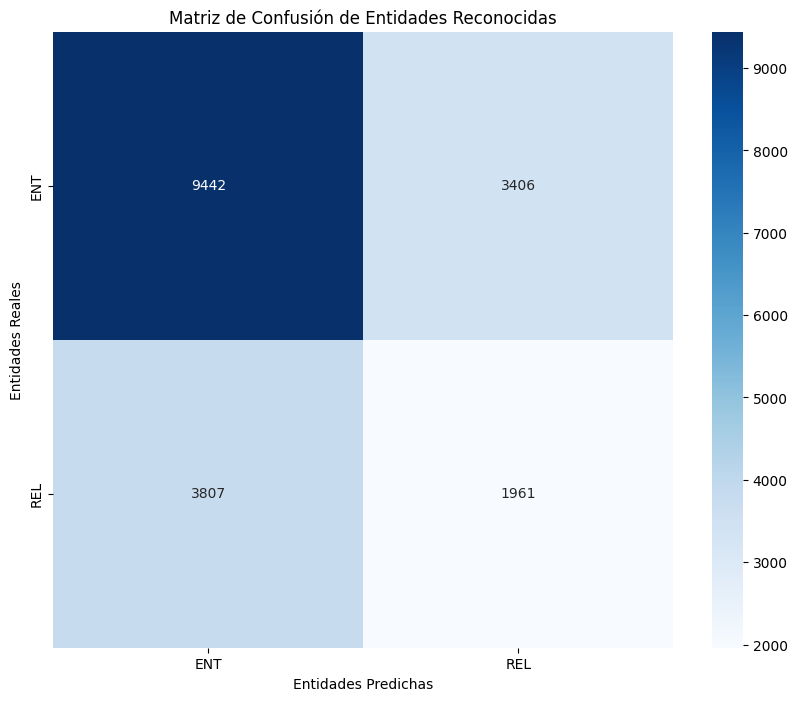

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

real_labels = list(set(comparison_df['real_entity']))
pred_labels = list(set(comparison_df['predicted_entity']))

labels = sorted(set(real_labels + pred_labels))

conf_matrix = confusion_matrix(comparison_df['real_entity'], comparison_df['predicted_entity'], labels=labels)

conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=conf_matrix_df.columns, yticklabels=conf_matrix_df.index)
plt.title('Matriz de Confusión de Entidades Reconocidas')
plt.ylabel('Entidades Reales')
plt.xlabel('Entidades Predichas')
plt.show()

##Generando los jsons

In [ ]:
predicted_results

[('Mujer con vestido negro y tacones',
  {'entities': [(0, 5, 'ENT'),
    (10, 17, 'ENT'),
    (18, 23, 'ENT'),
    (26, 33, 'ENT')]}),
 ('Barcos en el océano',
  {'entities': [(0, 6, 'ENT'), (7, 9, 'REL'), (13, 19, 'ENT')]}),
 ('Jugadores deportivos que saludan en la cancha',
  {'entities': [(0, 9, 'ENT'),
    (25, 32, 'REL'),
    (33, 35, 'REL'),
    (39, 45, 'ENT')]}),
 ('Hombre sosteniendo un caballo',
  {'entities': [(7, 18, 'REL'), (22, 29, 'ENT')]}),
 ('Muro de roca y agua turquesa clara',
  {'entities': [(0, 4, 'ENT'),
    (8, 12, 'ENT'),
    (15, 19, 'ENT'),
    (20, 28, 'ENT'),
    (29, 34, 'ENT')]}),
 ('Un niño haciendo manualidades',
  {'entities': [(3, 7, 'ENT'), (8, 16, 'REL'), (17, 29, 'ENT')]}),
 ('Hombre fumando frente al espejo',
  {'entities': [(7, 14, 'REL'), (15, 21, 'ENT'), (25, 31, 'ENT')]}),
 ('Una mujer firmando un contrato',
  {'entities': [(4, 9, 'ENT'), (10, 18, 'REL'), (22, 30, 'ENT')]}),
 ('Agente inmobiliario y cliente que usa una computadora portátil',
 

In [ ]:
import json

def generate_json(results):
  id_counter = 0

  for oracion, tags in results:
    scene = {
        'objects': [],
        'relations': {},
        'descriptions': []
    }

    entities = {}

    for start, end, ner in tags['entities']:
      if ner == 'ENT':
        entity = oracion[start:end]
        if entity not in entities:
          entities[entity] = id_counter
          scene['objects'].append({
              'id': id_counter,
              'entidad': entity
          })
          id_counter += 1

    relations = []
    for start_rel, end_rel, tipo in tags['entities']:
      if tipo == 'REL':
        relation = oracion[start_rel:end_rel]

        obj1 = None
        obj2 = None

        for start_ent, end_ent, tipo_ent in tags['entities']:
          if obj1 is None or obj2 is None:
            if tipo_ent == 'ENT':
              entidad = oracion[start_ent:end_ent]
              id_entidad = entities.get(entidad)

              if start_ent < start_rel:
                obj1 = id_entidad
              elif start_ent > end_rel:
                obj2 = id_entidad

        if obj1 is not None and obj2 is not None:
          relations.append({
              'type': relation,
              'obj1': obj1,
              'obj2': obj2
          })
        elif obj1 is not None and obj2 is None:
          relations.append({
              'type': relation,
              'obj1': obj1,
          })

    try:
      scene['relations'] = relations
    except:
      pass
    scene['descriptions'].append(oracion)
  return scene

In [ ]:
from google.colab import files
i = 0
for title, value in predicted_results:
  json_file = generate_json([(title, value)])
  with open(f'output_{i + 1}.json', 'w', encoding='utf-8') as f:
    json.dump(json_file, f, ensure_ascii=False)
  files.download(f'output_{i + 1}.json')
  i += 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Exportamos el pipeline

In [ ]:
from spacy import displacy

svg = displacy.render(doc, jupyter=True, style="ent")
nlp.to_disk("mypipe")

In [ ]:
!apt install tree
!tree mypipe/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (397 kB/s)
Selecting previously unselected package tree.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
mypipe/
├── config.cfg
├── meta.json
├── ner
│   ├── cfg
│   ├── model
│   └── moves
├── tokenizer
└── vocab
    ├── key2row
    ├── lookups.bin
    ├── strings.json
    ├── vectors
    └── vectors.cfg

2 directories, 11 files
